In [5]:
import pylab 
import scipy 

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

import numpy as np
from IPython.display import HTML

### 2D Heart

C:\Users\angel.barrera.UNIFIN\AppData\Local\Temp\ipykernel_52404\1575346993.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  x = scipy.linspace(-2,2,1500)
C:\Users\angel.barrera.UNIFIN\AppData\Local\Temp\ipykernel_52404\1575346993.py:2: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  y1 = scipy.sqrt(1-(abs(x)-1)**2)
C:\Users\angel.barrera.UNIFIN\AppData\Local\Temp\ipykernel_52404\1575346993.py:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  y2 = -3*scipy.sqrt(1-(abs(x)/2)**0.5)


(-2.5, 2.5)

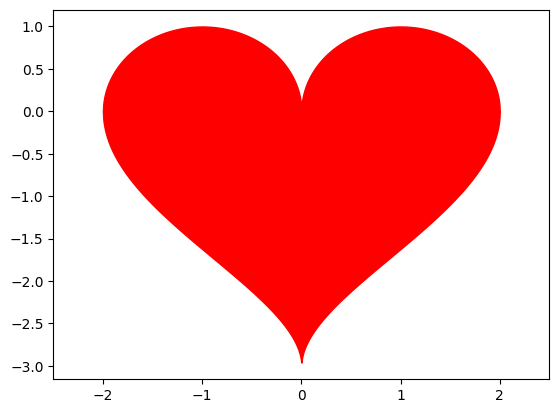

In [6]:
x = scipy.linspace(-2,2,1500) 
y1 = scipy.sqrt(1-(abs(x)-1)**2) 
y2 = -3*scipy.sqrt(1-(abs(x)/2)**0.5) 
pylab.fill_between(x, y1, color='red') 
pylab.fill_between(x, y2, color='red') 
pylab.xlim([-2.5, 2.5]) 

### 3D Heart

(-1.5, 1.5)

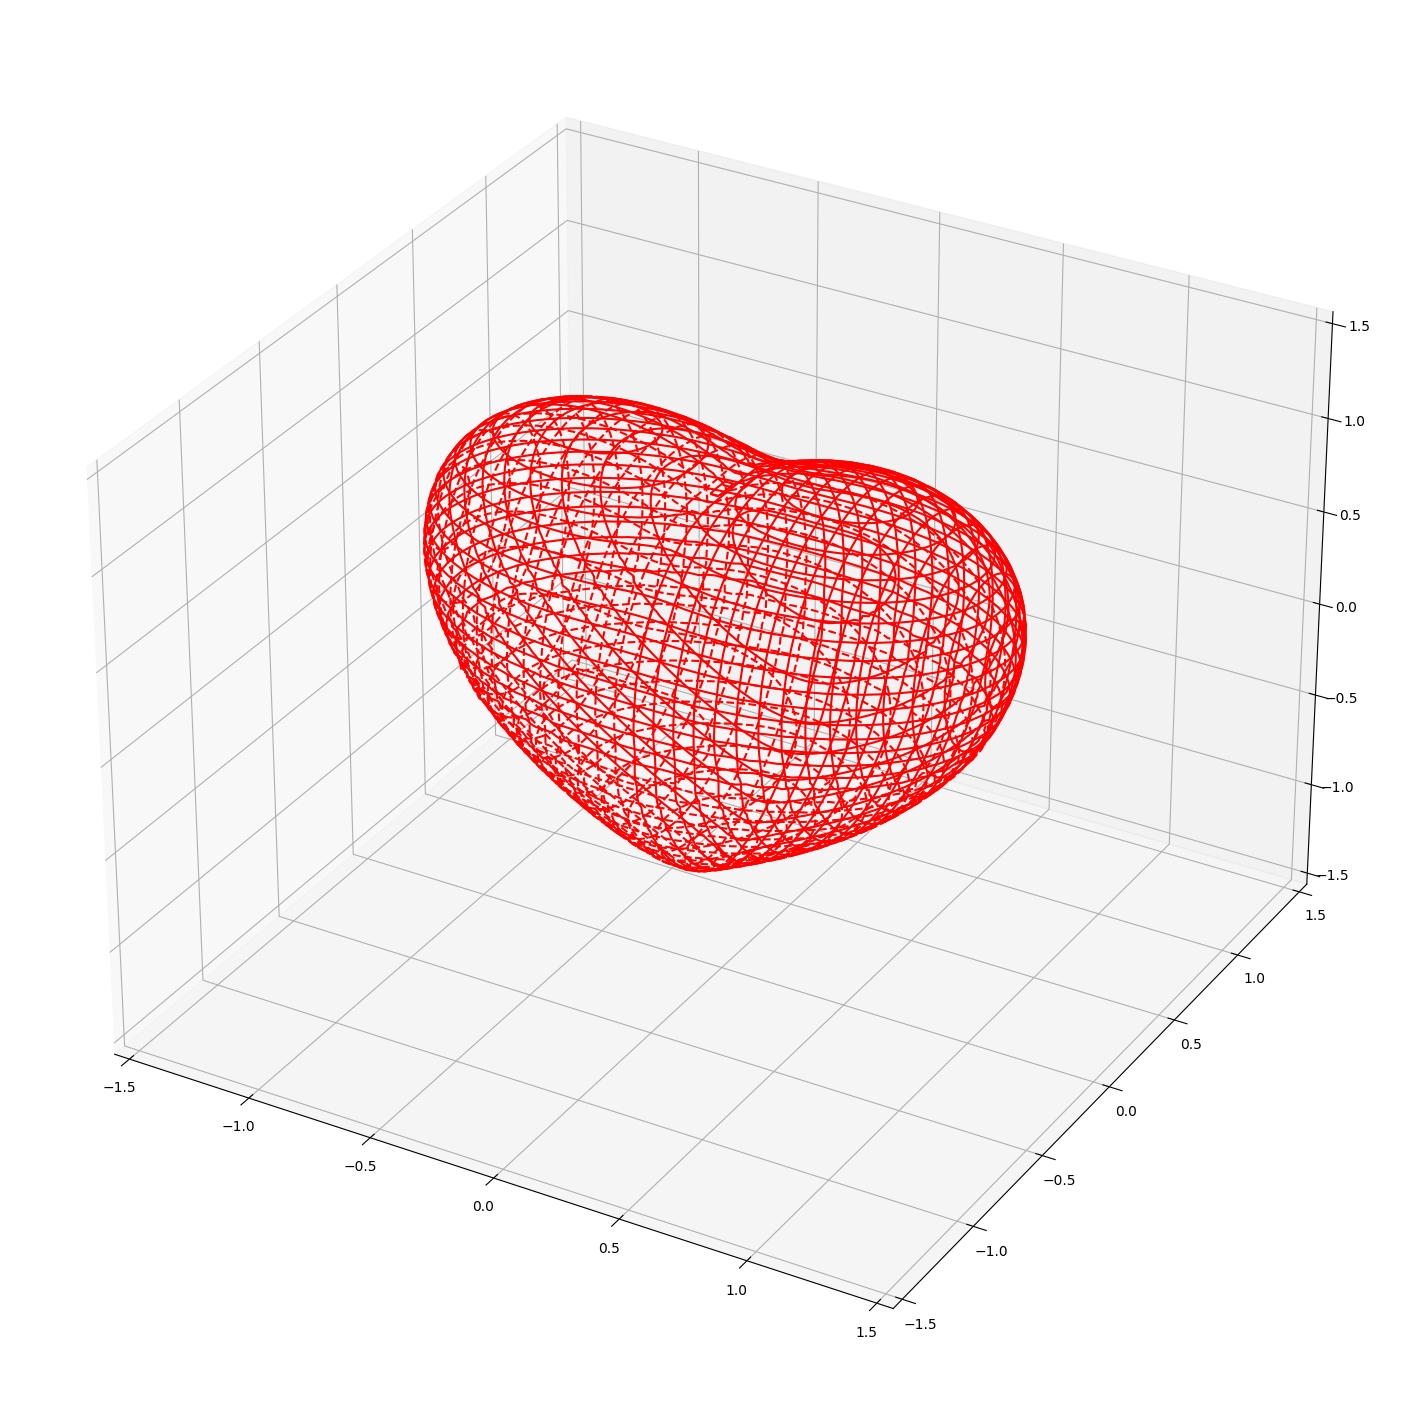

In [7]:
def heart_3d(x,y,z):
   return (x**2+(9/4)*y**2+z**2-1)**3-x**2*z**3-(9/80)*y**2*z**3

bbox=(-1.5, 1.5)
fn = heart_3d

xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')
A = np.linspace(xmin, xmax, 100)     # resolution of the contour
B = np.linspace(xmin, xmax, 40)      # number of slices
A1, A2 = np.meshgrid(A, A)           # grid on which the contour is plotted

for z in B: # plot contours in the XY plane
    X, Y = A1, A2
    Z = fn(X, Y, z)
    cset = ax.contour(X, Y, Z+z, [z], zdir='z', colors=('r',))
    # [z] defines the only level to plot
    # for this contour for this value of z

for y in B:  # plot contours in the XZ plane
    X, Z = A1, A2
    Y = fn(X, y, Z)
    cset = ax.contour(X, Y+y, Z, [y], zdir='y', colors=('red',))

for x in B: # plot contours in the YZ plane
    Y, Z = A1, A2
    X = fn(x, Y, Z)
    cset = ax.contour(X+x, Y, Z, [x], zdir='x',colors=('red',))

# Must set plot limits because the contour will likely extend way beyond the displayed level.
# Otherwise matplotlib extends the plot limits to encompass all values in the contour.
ax.set_zlim3d(zmin, zmax)
ax.set_xlim3d(xmin, xmax)
ax.set_ylim3d(ymin, ymax)

### 3D Heart with animation

In [8]:
# def animate(i):
#     ax.view_init(elev=10., azim=i)
#     return fig,

# anim = animation.FuncAnimation(fig, animate,
#                                frames=360, interval=20, blit=True)

# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])   # Save as video
# HTML(anim.to_html5_video())   # Show as HTML